In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline

In [2]:
import imp

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBRFClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adamricks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from os import listdir

In [ ]:
files = listdir('./Data') 

In [ ]:
files

In [ ]:
file_paths = []
for i in files[1:]:
    if i[-1] != 'x' and i[-1] != 'e':
        file_paths.append('data/' + str(i))

In [ ]:
def specific_read(csv_path):
    return pd.read_csv(csv_path,low_memory=False, header=1)

In [ ]:
df = pd.concat(map(specific_read, file_paths))

In [ ]:
df.to_csv('LC_Compiled.csv')

In [6]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False)

In [8]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP

In [30]:
imp.reload(LCP)
imp.reload(LCC)

<module 'src.LC_Clean_Assist' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py'>

In [10]:
df = LCC.clean_lc_for_plotting(df)

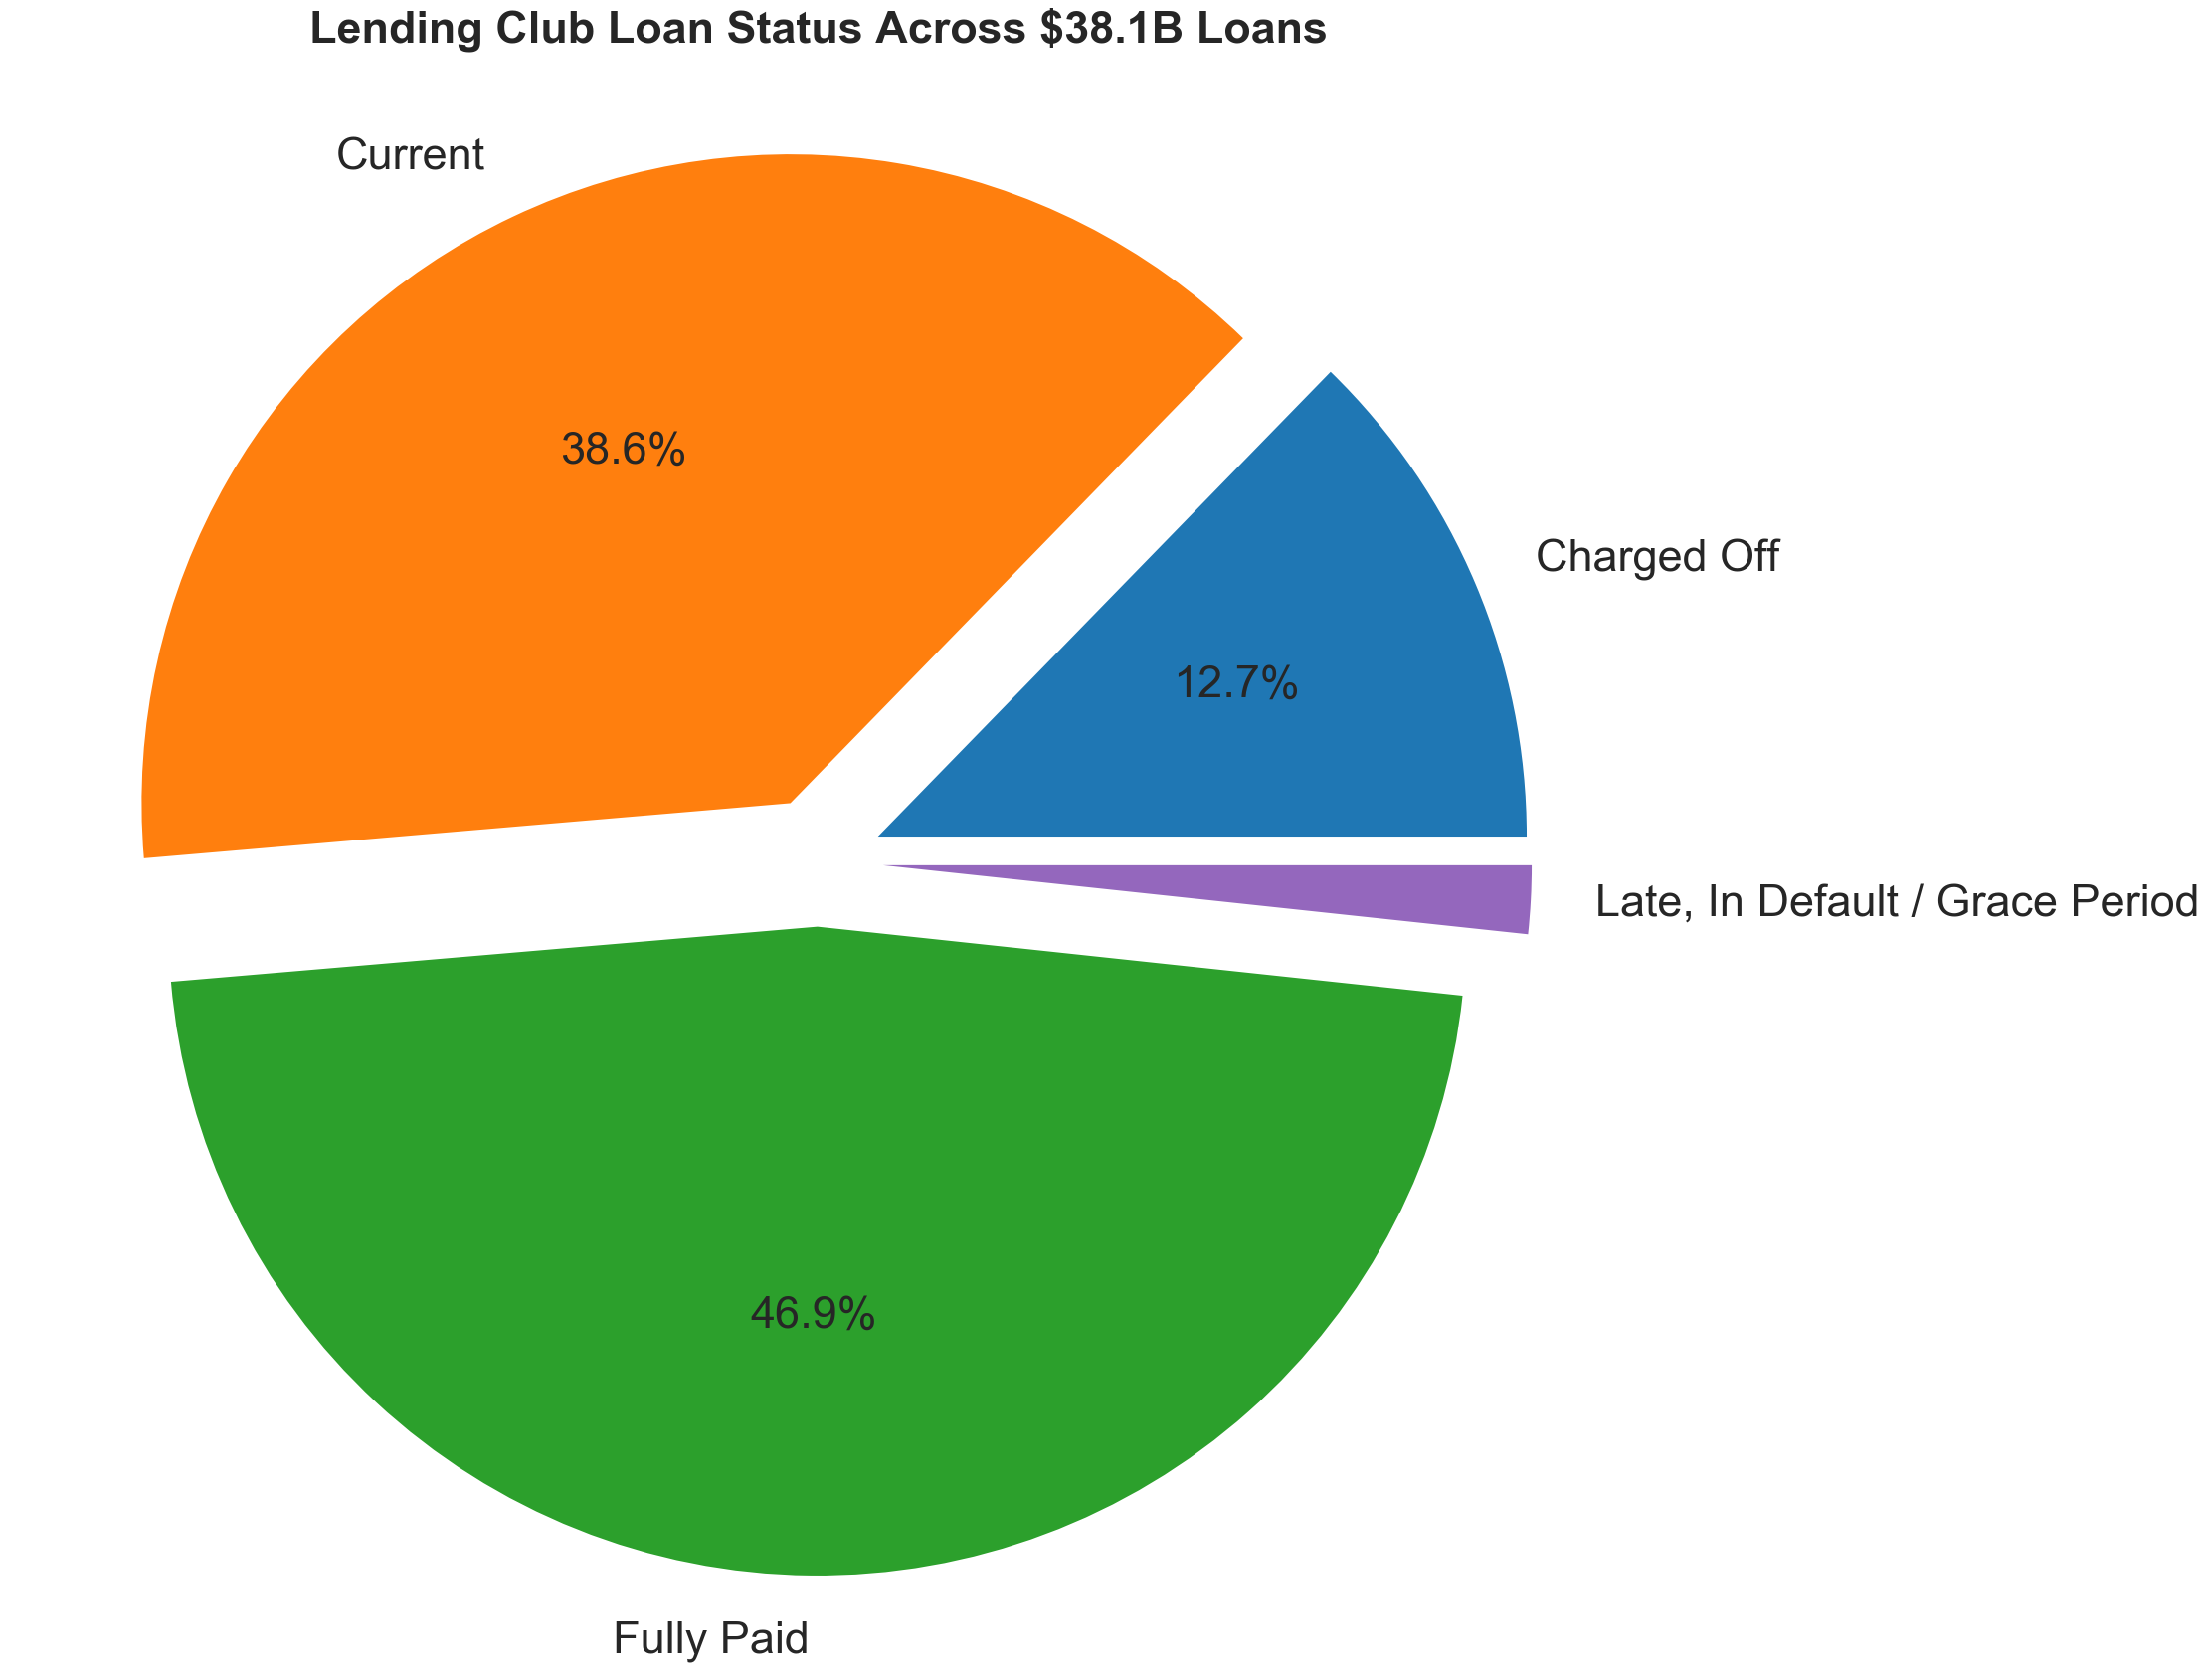

In [17]:
LCP.plot_loan_breakdown_pie(df)

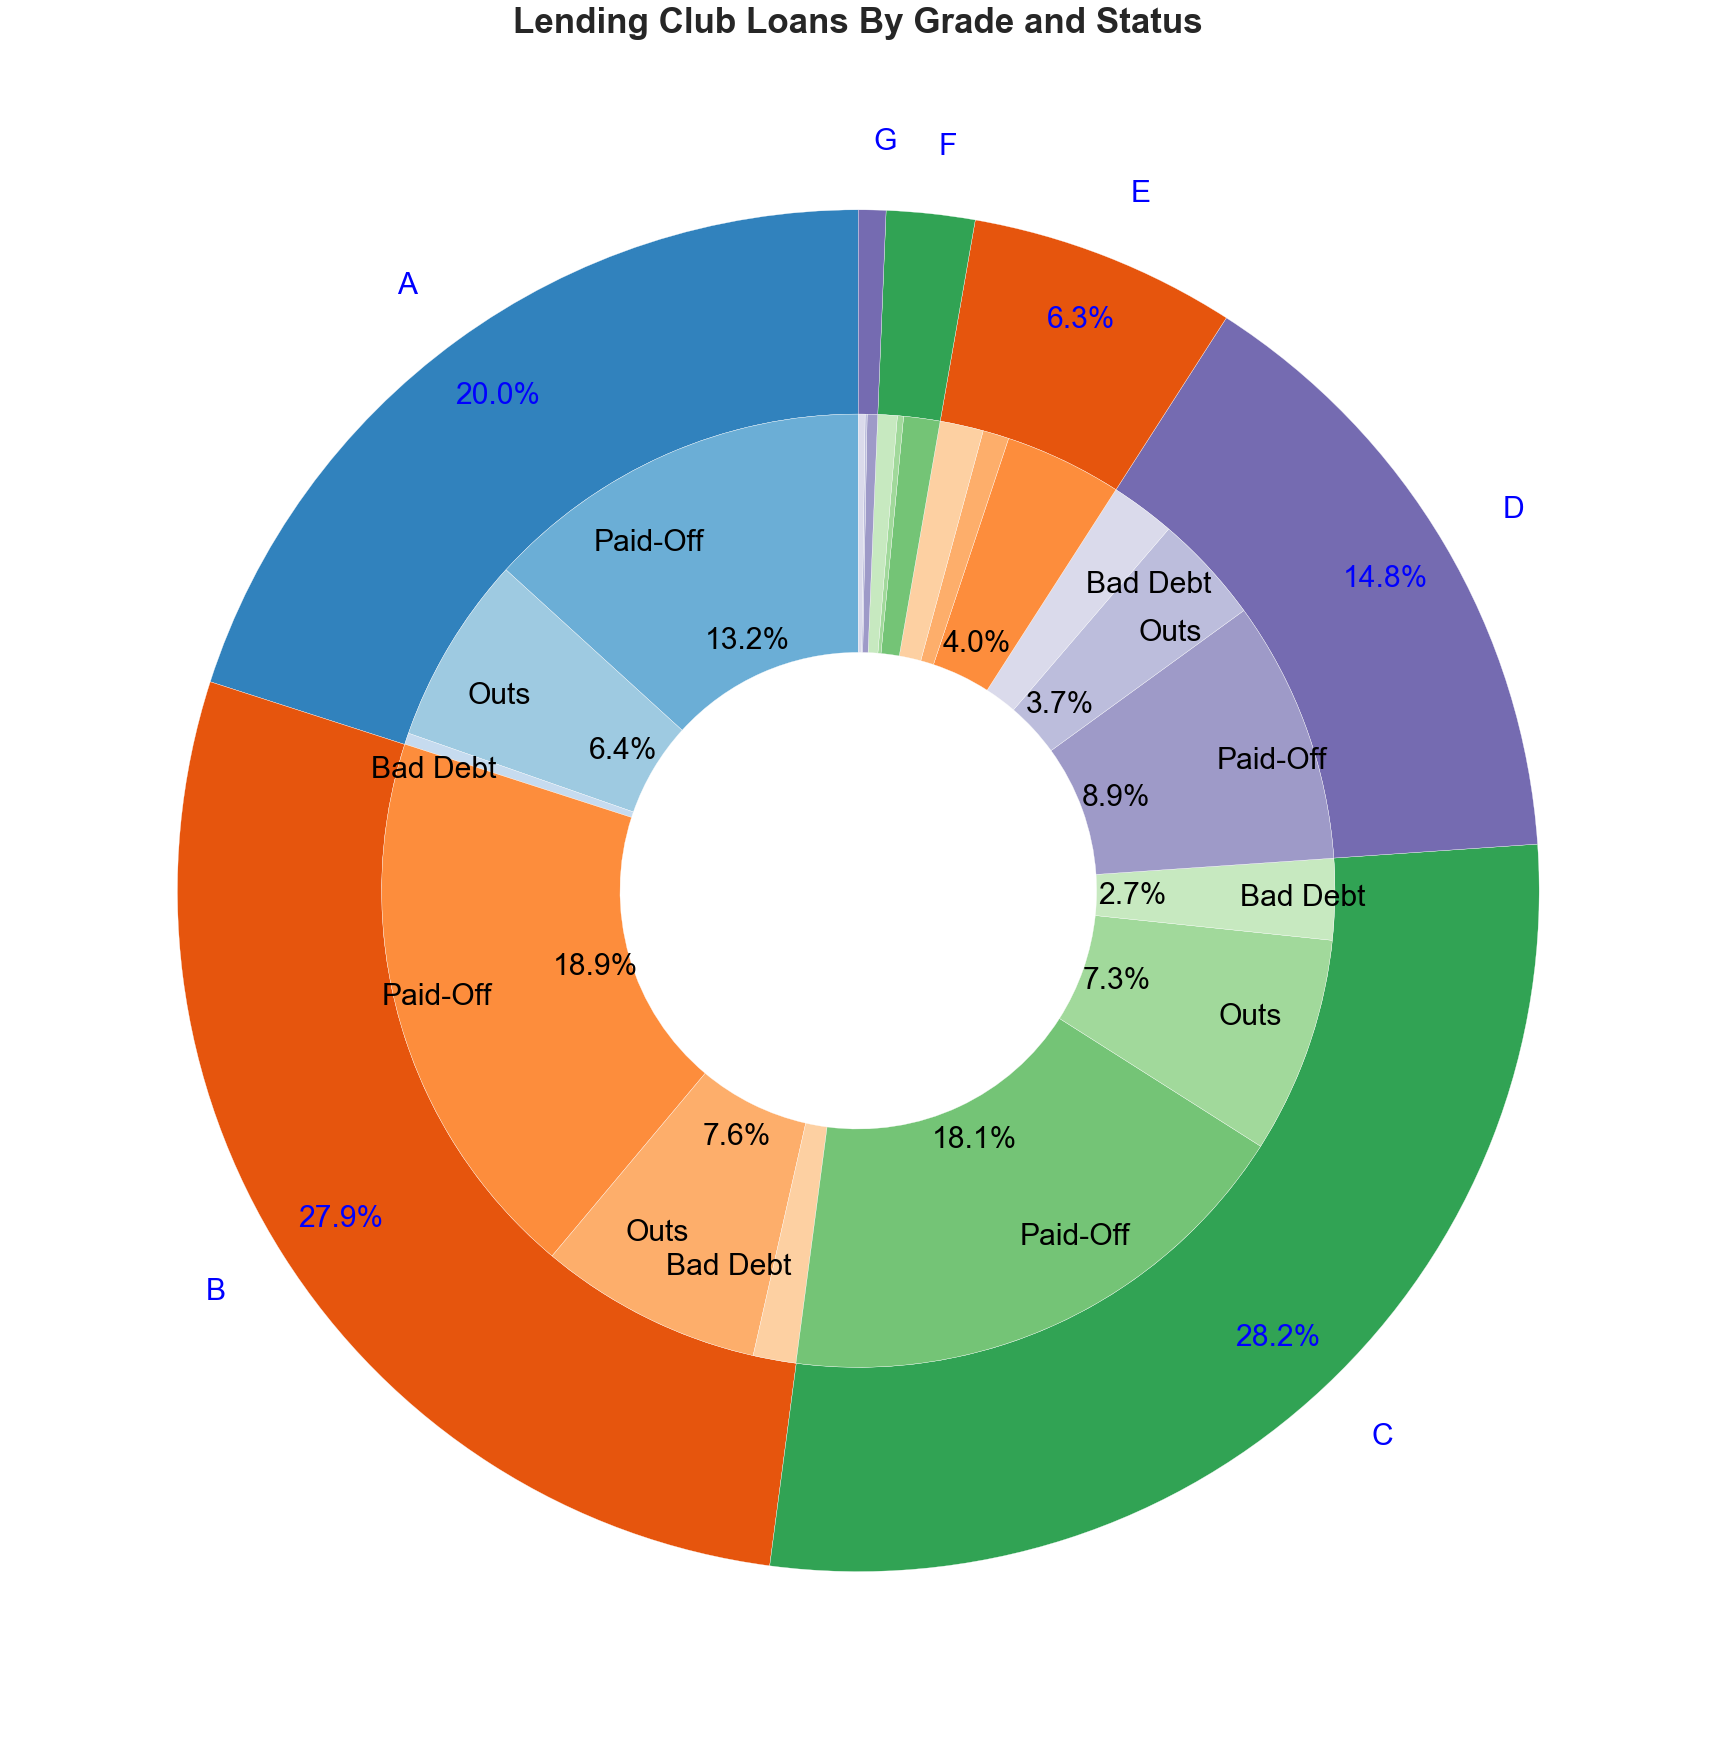

In [18]:
LCP.plot_grade_breakdown_pie(df)

In [27]:
LCP.choro_debt_state(df)

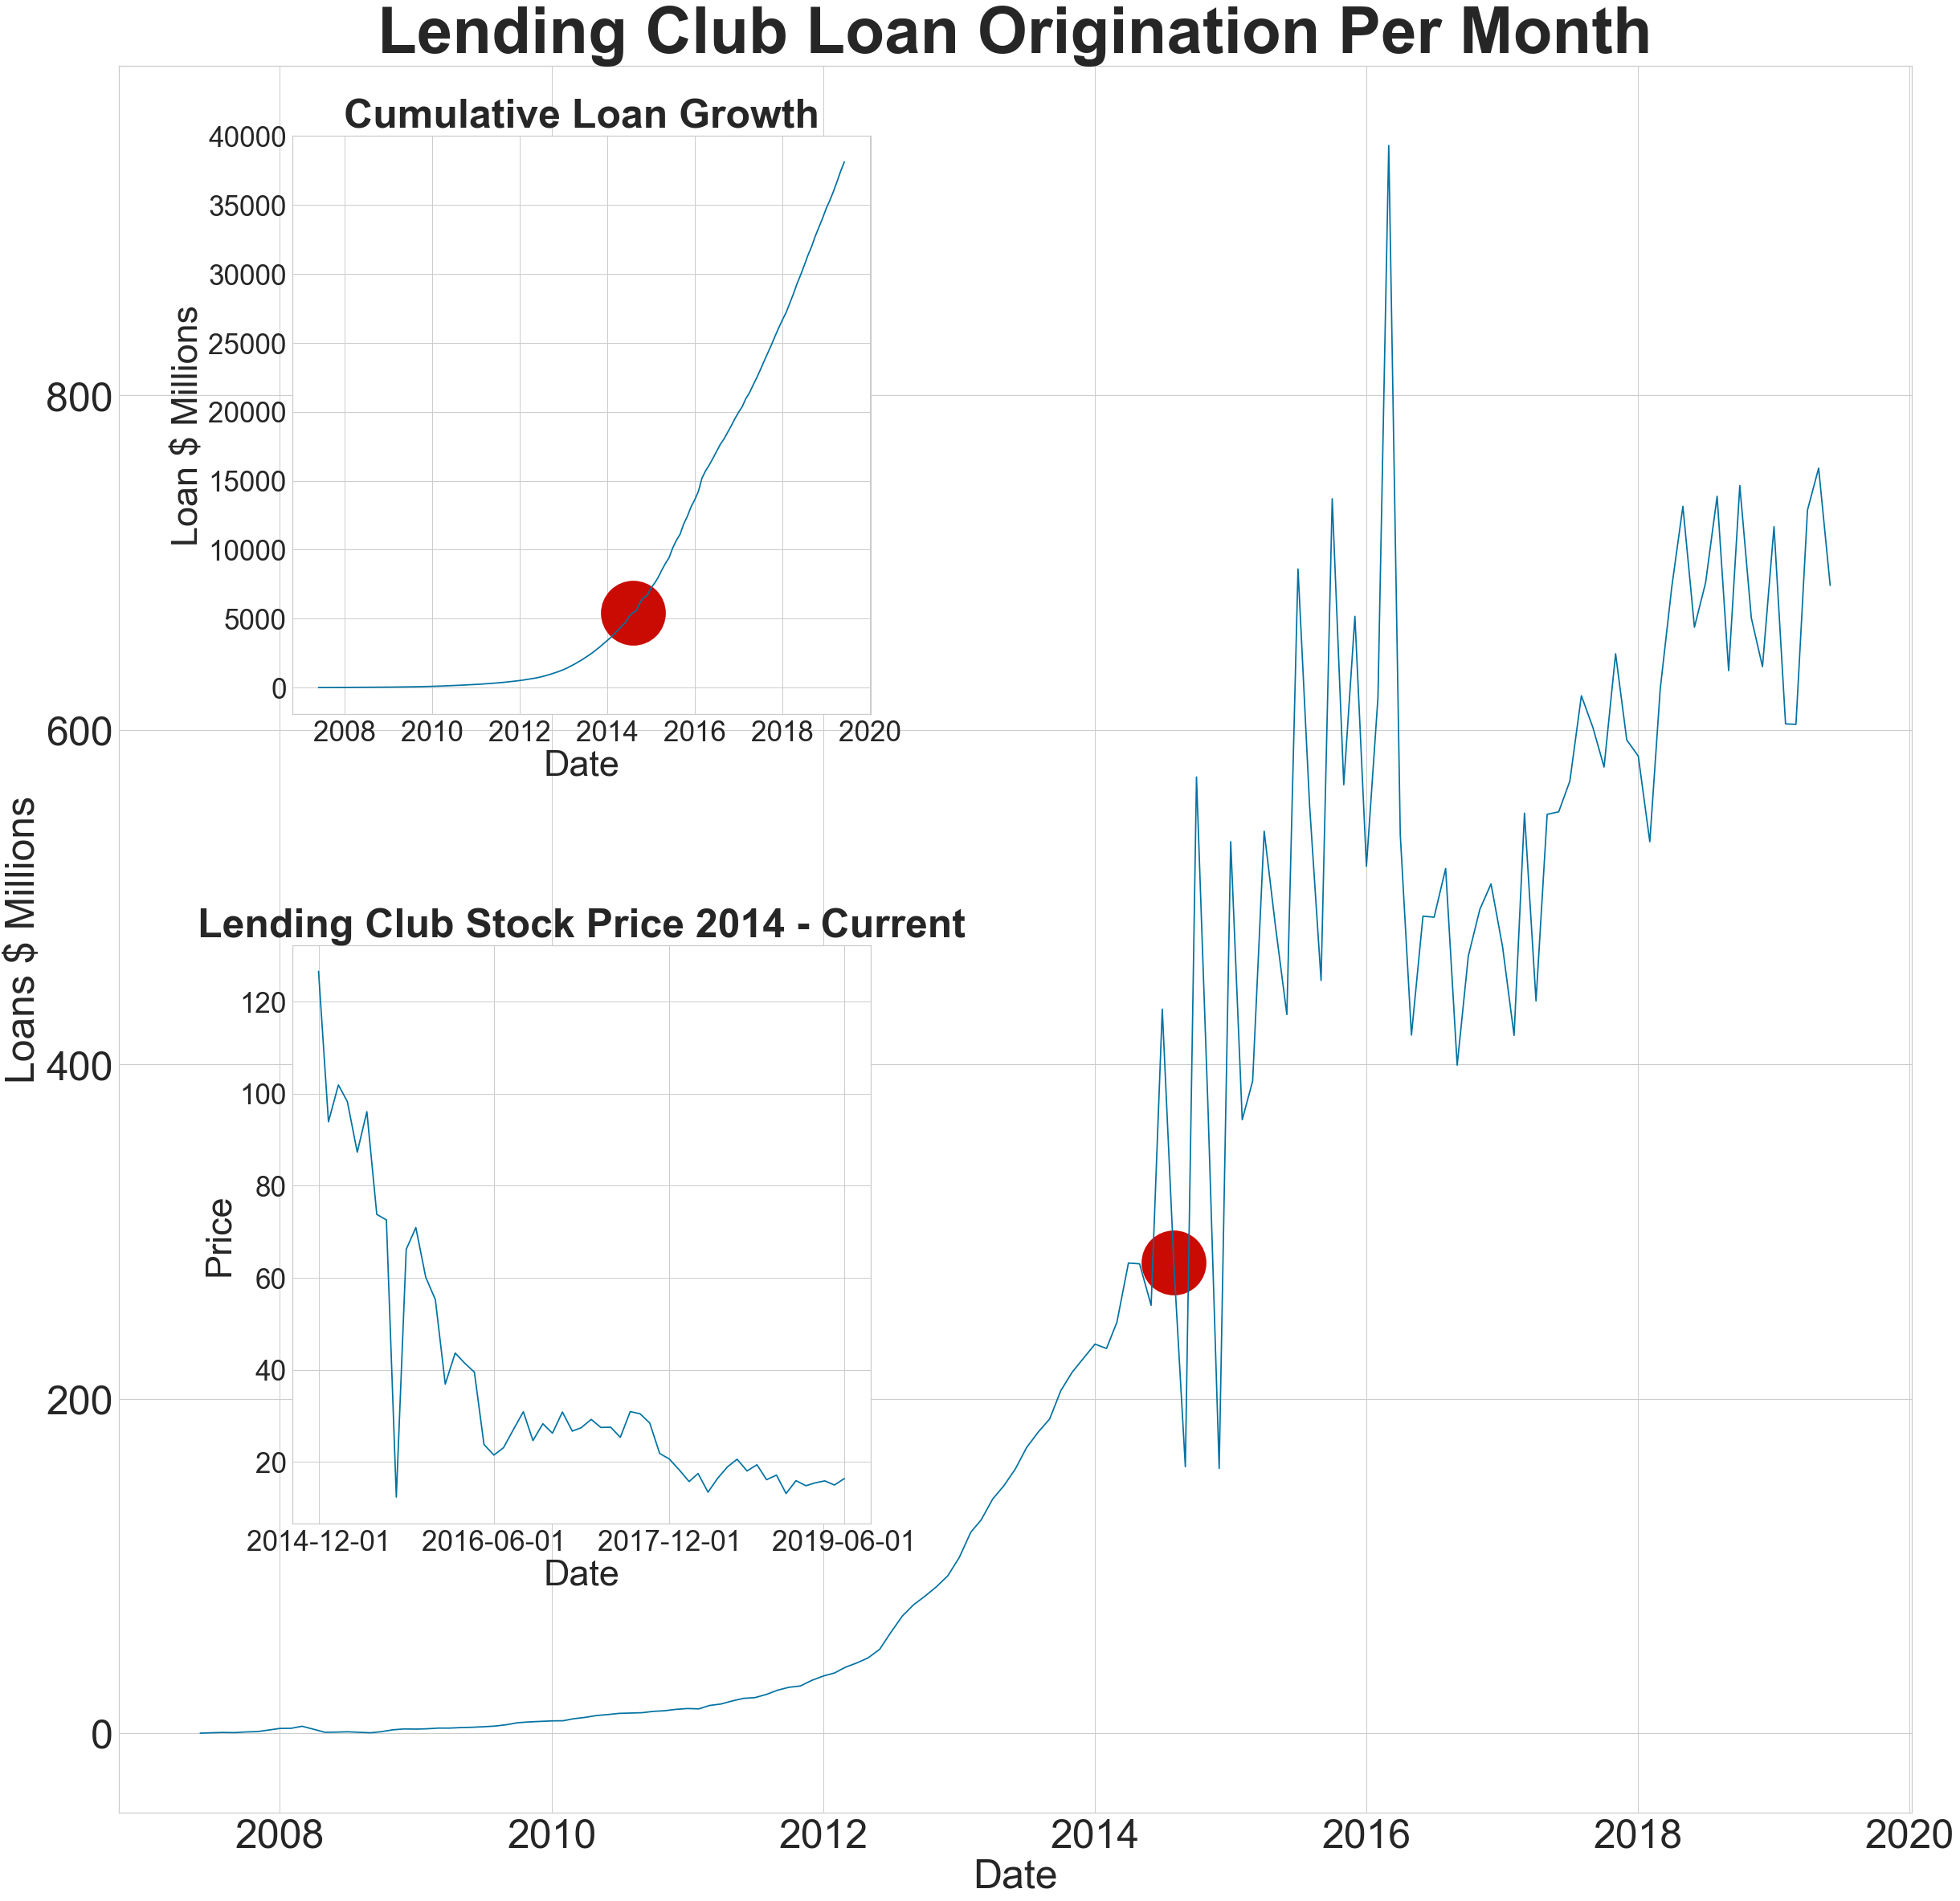

In [28]:
LCP.lc_time_series(df)

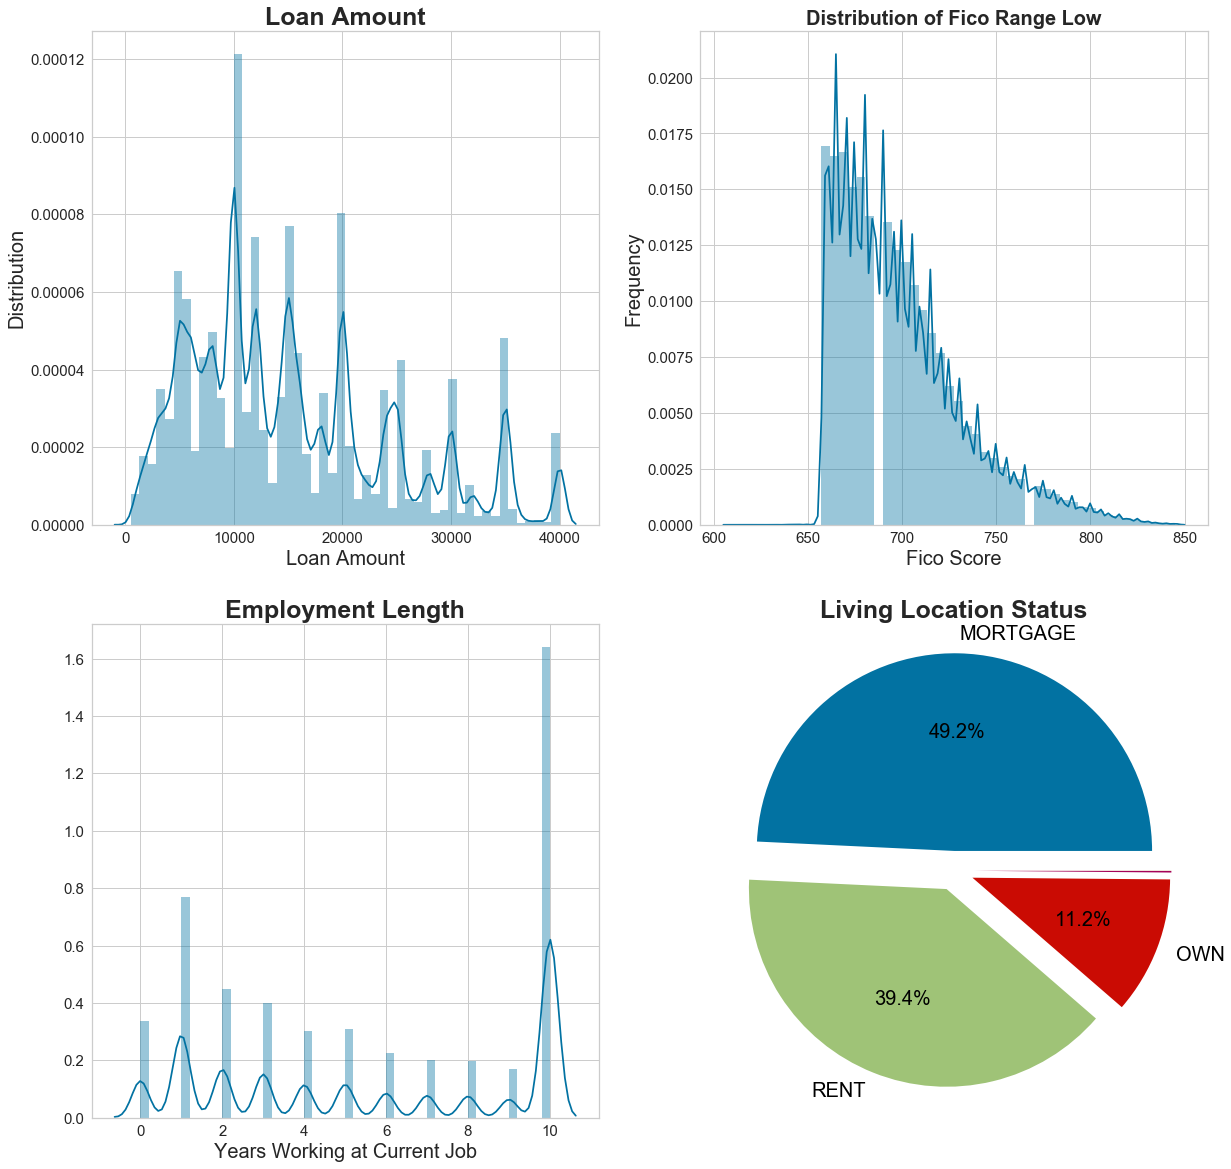

In [31]:
LCP.lc_individual_profile(df)

Create histograms for the following:
-  Loan Amount
-  Emplyoment Length
-  Int Rate
-  FICO Scores

Create Violin Chart for Incomes
<br><br>
Create Pie Chart for housing
<br><br>
Create violin plot of DTI
<br><br>
Create Pie Chart for title of loans

If person did not put title / desc, create one hot label, 
else create bag of words count vectorizer to then create a kmeans algorithm to cluster them

In [ ]:
df['title']=df['title'].apply(lambda x: str(x).lower())

In [ ]:
cv = CountVectorizer('english')

In [ ]:
cv.fit(df[df['title'] != 'nan']['title'])

In [ ]:
cv_mat = cv.transform(df[df['title'] != 'nan']['title'])

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df[df['title'] != 'nan']['title'])

In [ ]:
vocab = vectorizer.get_feature_names()

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,5))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
nmf = NMF(n_components = 100)
nmf.fit(X.toarray())
W = nmf.transform(X.toarray())
H = nmf.components_

for i in range(50):
    index = np.argsort(H[i,:])
#     print(index[-10:])
    print('most common for concept {}: \n'.format(i), [vocab[idx] for idx in index[-10:]])

In [ ]:
df['loan_amnt'].sum()

In [ ]:
df[['issue_d','loan_amnt']]

In [ ]:
df[df['issue_d'] > '2019-3-01']['loan_amnt'].sum() 